In [38]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

%matplotlib inline
# plt.style.use('ggplot')

# HELPER FUNCTIONS

In [39]:
def read_data(file_path, column_names):
    """Reads the data from the specified file and retrieves the column names
    
    Args:
        file_path: The path of the file as a String
        column_names: Array of Strings representing the names of the colunms
        
    Returns:
        A DataFrame of the read in data
    """
    data = pd.read_csv(file_path, header = 0, names = column_names)
    return data

# Setup the Lake_Dataset

In [40]:
cols = ['Temperature', 'Sp_Cond', 'pH_mV', 'pH', 'Turbidity', 'Chlorophyll', 'Chlorophyll_RFU',
        'ODOSat', 'ODO', 'BGA_Phycocyanin_RFU']

cols_to_keep = []
# cols_to_keep.append('Temperature')
# cols_to_keep.append('Sp_Cond')
# cols_to_keep.append('pH_mV')
# cols_to_keep.append('pH')
# cols_to_keep.append('Turbidity')
# cols_to_keep.append('Chlorophyll')
# cols_to_keep.append('Chlorophyll_RFU')
# cols_to_keep.append('ODOSat')
# cols_to_keep.append('ODO')
cols_to_keep.append('BGA_Phycocyanin_RFU')

lake_dataset = read_data('./data/cleaned/bird_lake_combined_no_timestamp.csv', cols) 

for col in cols:
    if col not in cols_to_keep:
        lake_dataset = lake_dataset.drop(col, axis=1)
        
lake_dataset.head()

,BGA_Phycocyanin_RFU
0,0.5
1,0.5
2,0.5
3,0.4
4,0.4


In [41]:
forecast_out = int(15)
lake_dataset['Prediction'] = lake_dataset[['BGA_Phycocyanin_RFU']].shift(-forecast_out)

In [42]:
lake_dataset.head()

,BGA_Phycocyanin_RFU,Prediction
0,0.5,0.3
1,0.5,0.3
2,0.5,0.4
3,0.4,0.4
4,0.4,0.4


In [43]:
lake_dataset.tail()

,BGA_Phycocyanin_RFU,Prediction
32565,1.2,NaN
32566,1.2,NaN
32567,1.2,NaN
32568,1.2,NaN
32569,1.2,NaN


In [44]:
X = np.array(lake_dataset.drop(['Prediction'], 1))
# X = preprocessing.scale(X)

In [54]:
X[:30]

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.3],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.3],
       [ 0.4],
       [ 0.3],
       [ 0.3],
       [ 0.3],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.3],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.4],
       [ 0.5],
       [ 0.4],
       [ 0.5]])

In [55]:
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

In [56]:
y = np.array(lake_dataset['Prediction'])
y = y[:-forecast_out]

In [57]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size= 0.3)

ValueError: Found input variables with inconsistent numbers of samples: [32540, 32555]

In [58]:
X_train[:30]

array([[ 0.7],
       [ 0.9],
       [ 0.3],
       [ 0.8],
       [ 0.9],
       [ 1.2],
       [ 0.7],
       [ 0.7],
       [ 0.9],
       [ 1.2],
       [ 0.3],
       [ 0.9],
       [ 1. ],
       [ 0.7],
       [ 0.7],
       [ 0.9],
       [ 0.8],
       [ 0.3],
       [ 0.6],
       [ 1.5],
       [ 1.6],
       [ 0.7],
       [ 0.5],
       [ 0.9],
       [ 0.6],
       [ 1. ],
       [ 0.1],
       [ 0.9],
       [ 1.6],
       [ 1. ]])

In [59]:
X_train.shape

(22788, 1)

In [60]:
y_train[:30]

array([ 0.5,  1. ,  0.4,  0.7,  0.8,  1.1,  0.8,  0.7,  0.9,  1.1,  0.4,
        0.8,  1. ,  0.8,  0.8,  0.9,  0.8,  0.4,  0.5,  1.4,  1.5,  0.7,
        0.6,  0.8,  2.9,  0.8,  0.2,  0.8,  0.8,  1.2])

In [61]:
clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.609450099297


In [62]:
X_forecast

array([[ 1.4],
       [ 1.4],
       [ 1.5],
       [ 1.4],
       [ 1.4],
       [ 1.4],
       [ 1.4],
       [ 1.4],
       [ 1.4],
       [ 1.3],
       [ 1.3],
       [ 1.3],
       [ 1.3],
       [ 1.3],
       [ 1.3]])

In [63]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[ 1.28861949  1.28861949  1.36611464  1.28861949  1.28861949  1.28861949
  1.28861949  1.28861949  1.28861949  1.21112434  1.21112434  1.21112434
  1.21112434  1.21112434  1.21112434]


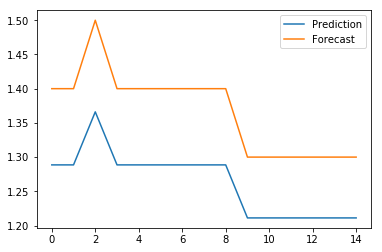

In [64]:
plt.plot(forecast_prediction, label="Prediction")
plt.plot(X_forecast, label="Forecast")
plt.legend()